In [1]:
# importing the required library
import numpy as np
import pandas as pd
import networkx as nx
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
# import visualization method
from unicodedata import normalize
from mlfinlab.networks.visualisations import generate_mst_server
from mlfinlab.networks.visualisations import generate_pmfg_server
from mlfinlab.networks.pmfg import PMFG
from mlfinlab.networks.mst import MST
from mlfinlab.networks.dash_graph import DashGraph,PMFGDash

In [2]:
# Read all data 
A = pd.read_html('Report16Jul2021120356.html')
B = pd.read_html('Report16Jul2021120443.html')
C = pd.read_html('Report16Jul2021120536.html')
D = pd.read_html('Report16Jul2021120614.html')
E = pd.read_html('Report16Jul2021121350.html')
F = pd.read_html('Report16Jul2021121442.html')
G = pd.read_html('Report16Jul2021121540.html')
H = pd.read_html('Report16Jul2021121736.html')
I = pd.read_html('Report16Jul2021121824.html')
J = pd.read_html('Report16Jul2021121948.html')

In [3]:
#A[11]

In [4]:
# choosing the data that we will use 
A1=A[11]
B1=B[11]
C1=C[11]
D1=D[11]
E1=E[11]
F1=F[11]
G1=G[11]
H1=H[11]
I1=I[11]
J1=J[11]

In [5]:
#A1

In [6]:
# changing the first row to be a header for all data
new_header1 = A1.iloc[0] #grab the first row for the header
A2 = A1[1:] #take the data less the header row
A2.columns = new_header1 #set the header row as the df header

New_header2 = B1.iloc[0]
B2 = B1[1:]
B2.columns = New_header2

New_header3 = C1.iloc[0]
C2 = C1[1:]
C2.columns = New_header3

New_header4 = D1.iloc[0]
D2 = D1[1:]
D2.columns = New_header4

New_header5 = E1.iloc[0]
E2 = E1[1:]
E2.columns = New_header5

New_header6 = F1.iloc[0]
F2 = F1[1:]
F2.columns = New_header6

New_header7 = C1.iloc[0]
G2 = G1[1:]
G2.columns = New_header7

New_header8 = H1.iloc[0]
H2 = H1[1:]
H2.columns = New_header8

New_header9 = I1.iloc[0]
I2 = I1[1:]
I2.columns = New_header9

New_header10 = J1.iloc[0]
J2 = J1[1:]
J2.columns = New_header10

In [7]:
# Now we need to rename the header of each stocks using stocks names
A11=A2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'SBK','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

B11=B2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'AGL','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

C11=C2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'TKG','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

D11=D2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'WHL','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

E11=E2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'BAT','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

F11=F2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'SOL','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

G11=G2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'APN','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

H11=H2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'BHP','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

I11=I2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'SHP','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

J11=J2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'SLM','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

In [8]:
# put date as the index for all data
A_1=A11.set_index('1')
B_1=B11.set_index('1')
C_1=C11.set_index('1')
D_1=D11.set_index('1')
E_1=E11.set_index('1')
F_1=F11.set_index('1')
G_1=G11.set_index('1')
H_1=H11.set_index('1')
I_1=I11.set_index('1')
J_1=J11.set_index('1')

In [23]:
# dropping all the column and remain only  column with the name of company for all the data
AX=A_1.dropna(thresh=10)['SBK']
BX=B_1.dropna(thresh=10)['AGL']
CX=C_1.dropna(thresh=10)['TKG']
DX=D_1.dropna(thresh=10)['WHL']
EX=E_1.dropna(thresh=10)['BAT']
FX=F_1.dropna(thresh=10)['SOL']
GX=G_1.dropna(thresh=10)['APN']
HX=H_1.dropna(thresh=10)['BHP']
IX=I_1.dropna(thresh=10)['SHP']
JX=J_1.dropna(thresh=10)['SLM']

In [24]:
# Now we need to concatinate our data as follows

In [25]:
st = pd.concat([AX,BX,CX,DX,EX,FX,GX,HX,IX,JX],axis=1,keys=['SBK','AGL','TKG','WHL','BAT',
                                                 'SOL','APN','BHP','SHP','SLM'])
st

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
1,,,,,,,,,,
15 Jul 2021,12431,59856,4498,5328,288,21450,17227,45332,15570,5906
14 Jul 2021,12791,60599,4490,5365,292,23252,17150,45675,15500,5900
13 Jul 2021,12523,59643,4433,5213,304,22385,17169,45370,15308,5887
12 Jul 2021,13175,59452,4577,5424,300,22511,17272,45209,15964,6030
09 Jul 2021,13321,58800,4514,5511,295,22250,16805,44602,15787,6025
...,...,...,...,...,...,...,...,...,...,...
21 Jul 2016,13739,14929,6450,8650,12262,40095,37654,17784,19258,6447
20 Jul 2016,13675,14384,6450,8579,12248,39997,38056,17380,19498,6406
19 Jul 2016,13458,15399,6412,8437,12190,40088,37446,17928,17511,6321


In [26]:
# changing the data type to numeric
st1=st.astype('float')
st1

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
1,,,,,,,,,,
15 Jul 2021,12431.0,59856.0,4498.0,5328.0,288.0,21450.0,17227.0,45332.0,15570.0,5906.0
14 Jul 2021,12791.0,60599.0,4490.0,5365.0,292.0,23252.0,17150.0,45675.0,15500.0,5900.0
13 Jul 2021,12523.0,59643.0,4433.0,5213.0,304.0,22385.0,17169.0,45370.0,15308.0,5887.0
12 Jul 2021,13175.0,59452.0,4577.0,5424.0,300.0,22511.0,17272.0,45209.0,15964.0,6030.0
09 Jul 2021,13321.0,58800.0,4514.0,5511.0,295.0,22250.0,16805.0,44602.0,15787.0,6025.0
...,...,...,...,...,...,...,...,...,...,...
21 Jul 2016,13739.0,14929.0,6450.0,8650.0,12262.0,40095.0,37654.0,17784.0,19258.0,6447.0
20 Jul 2016,13675.0,14384.0,6450.0,8579.0,12248.0,39997.0,38056.0,17380.0,19498.0,6406.0
19 Jul 2016,13458.0,15399.0,6412.0,8437.0,12190.0,40088.0,37446.0,17928.0,17511.0,6321.0


## Addition part on how can we construct the portfolio using MPT

In [27]:
st1.index.names = ['Date']
st1.head(5)

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
Date,,,,,,,,,,
15 Jul 2021,12431.0,59856.0,4498.0,5328.0,288.0,21450.0,17227.0,45332.0,15570.0,5906.0
14 Jul 2021,12791.0,60599.0,4490.0,5365.0,292.0,23252.0,17150.0,45675.0,15500.0,5900.0
13 Jul 2021,12523.0,59643.0,4433.0,5213.0,304.0,22385.0,17169.0,45370.0,15308.0,5887.0
12 Jul 2021,13175.0,59452.0,4577.0,5424.0,300.0,22511.0,17272.0,45209.0,15964.0,6030.0
09 Jul 2021,13321.0,58800.0,4514.0,5511.0,295.0,22250.0,16805.0,44602.0,15787.0,6025.0


In [28]:
# change date index into  numeric format
st1.index=pd.to_datetime(st1.index)
st1.head(5)

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
Date,,,,,,,,,,
2021-07-15,12431.0,59856.0,4498.0,5328.0,288.0,21450.0,17227.0,45332.0,15570.0,5906.0
2021-07-14,12791.0,60599.0,4490.0,5365.0,292.0,23252.0,17150.0,45675.0,15500.0,5900.0
2021-07-13,12523.0,59643.0,4433.0,5213.0,304.0,22385.0,17169.0,45370.0,15308.0,5887.0
2021-07-12,13175.0,59452.0,4577.0,5424.0,300.0,22511.0,17272.0,45209.0,15964.0,6030.0
2021-07-09,13321.0,58800.0,4514.0,5511.0,295.0,22250.0,16805.0,44602.0,15787.0,6025.0


# visualizing the best assets to invest


In [77]:
# From this data we want to calculate the log return for each stocks 
# ----so as we can measure day to day performance of the stocks
st1.head(5)

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
Date,,,,,,,,,,
2021-07-15,12431.0,59856.0,4498.0,5328.0,288.0,21450.0,17227.0,45332.0,15570.0,5906.0
2021-07-14,12791.0,60599.0,4490.0,5365.0,292.0,23252.0,17150.0,45675.0,15500.0,5900.0
2021-07-13,12523.0,59643.0,4433.0,5213.0,304.0,22385.0,17169.0,45370.0,15308.0,5887.0
2021-07-12,13175.0,59452.0,4577.0,5424.0,300.0,22511.0,17272.0,45209.0,15964.0,6030.0
2021-07-09,13321.0,58800.0,4514.0,5511.0,295.0,22250.0,16805.0,44602.0,15787.0,6025.0


# 4.2 NETWORK CONSTRUCTION

## Now we need to calculate the log return/ daily returns for our stock and we do it by using the following formula

$$R_{t}=np.log\left(\frac{S_t}{S_{t-1}}\right)$$

where by 

$R_t$ is the return at time $t$

$S_{t}$ is the stock price at time $t$

$S_{t-1}$ is the stock price at time $t-1$

#### Example on how to calculate it one by one 

$$R_{t}=np.log\left(\frac{12791.0}{12431.0}\right)$$

$$R_{t}=0.028548445807677805$$

In [78]:
# Now the log return is given as
log_return_decline=np.log(st1).diff().iloc[1:]
log_return_decline

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
Date,,,,,,,,,,
2021-07-14,0.028548,0.012337,-0.001780,0.006920,0.013793,0.080667,-0.004480,0.007538,-0.004506,-0.001016
2021-07-13,-0.021175,-0.015902,-0.012776,-0.028741,0.040274,-0.038000,0.001107,-0.006700,-0.012464,-0.002206
2021-07-12,0.050754,-0.003208,0.031967,0.039678,-0.013245,0.005613,0.005981,-0.003555,0.041961,0.024000
2021-07-09,0.011021,-0.011027,-0.013860,0.015913,-0.016807,-0.011662,-0.027410,-0.013517,-0.011149,-0.000830
2021-07-08,-0.039116,-0.048076,-0.022176,-0.017573,0.043124,-0.053685,-0.009266,-0.047616,0.019943,0.001658
...,...,...,...,...,...,...,...,...,...,...
2016-07-21,0.003573,0.033996,-0.027675,0.002663,-0.003176,0.001123,-0.001274,0.028981,-0.035252,-0.018899
2016-07-20,-0.004669,-0.037189,0.000000,-0.008242,-0.001142,-0.002447,0.010620,-0.022979,0.012385,-0.006380
2016-07-19,-0.015996,0.068186,-0.005909,-0.016691,-0.004747,0.002273,-0.016159,0.031044,-0.107483,-0.013358


# SHARPE RATIO

In [79]:
#-- Get annualised mean returns
mus = (1+log_return_decline.mean())**252 - 1
#-- Get covariances and variances
#- Variance along diagonal of covariance matrix
#- Multiply by 252 to annualise it
#- https://quant.stackexchange.com/questions/4753/annualized-covariance
cov = log_return_decline.cov()*252

In [80]:
#- How many assests to include in each portfolio
n_assets = 5
#-- How many portfolios to generate
n_portfolios = 1000

#-- Initialize empty list to store mean-variance pairs for plotting
mean_variance_pairs = []

np.random.seed(75)
#-- Loop through and generate lots of random portfolios
for i in range(n_portfolios):
    #- Choose assets randomly without replacement
    assets = np.random.choice(list(log_return_decline.columns), n_assets, replace=False)
    #- Choose weights randomly
    weights = np.random.rand(n_assets)
    #- Ensure weights sum to 1
    weights = weights/sum(weights)

    #-- Loop over asset pairs and compute portfolio return and variance
    #- https://quant.stackexchange.com/questions/43442/portfolio-variance-explanation-for-equation-investments-by-zvi-bodie
    portfolio_E_Variance = 0
    portfolio_E_Return = 0
    for i in range(len(assets)):
        portfolio_E_Return += weights[i] * mus.loc[assets[i]]
        for j in range(len(assets)):
            #-- Add variance/covariance for each asset pair
            #- Note that when i==j this adds the variance
            portfolio_E_Variance += weights[i] * weights[j] * cov.loc[assets[i], assets[j]]
            
    #-- Add the mean/variance pairs to a list for plotting
    mean_variance_pairs.append([portfolio_E_Return, portfolio_E_Variance])

In [81]:
import plotly.graph_objs as go

In [82]:
#-- Plot the risk vs. return of randomly generated portfolios
#- Convert the list from before into an array for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)
risk_free_rate=0 #-- Include risk free rate here for sharpe ratio

#-- Create Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, 
                         y=mean_variance_pairs[:,0], 
                      #- Add color scale for sharpe ratio   
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=8,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers'))
#- Add title/labels
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  #title='Sample of Random Portfolios',
                  coloraxis_colorbar=dict(title="Sharpe Ratio"))

In [83]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = st1.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

SBK    0.350514
AGL    0.360678
TKG    0.467670
WHL    0.342587
BAT    0.558745
SOL    0.676568
APN    0.403738
BHP    0.307286
SHP    0.339963
SLM    0.327875
dtype: float64

In [84]:
# Calculating the sharpe ratio using risk free rate =0%
sharpe=(mus-0)/ann_sd
sharpe

SBK    0.037315
AGL   -0.652418
TKG    0.164786
WHL    0.284594
BAT    2.025772
SOL    0.195901
APN    0.426211
BHP   -0.526340
SHP    0.070692
SLM    0.035036
dtype: float64

In [85]:
# now we concatinate both and we have the following results
asset1=pd.concat([mus, ann_sd,sharpe],axis=1)# Creating a table for visualising returns and volatility of assets
asset1.columns=['Returns', 'Volatility','Sharpe Ratio']
asset1

,Returns,Volatility,Sharpe Ratio
SBK,0.013079,0.350514,0.037315
AGL,-0.235313,0.360678,-0.652418
TKG,0.077066,0.467670,0.164786
WHL,0.097498,0.342587,0.284594
BAT,1.131890,0.558745,2.025772
SOL,0.132540,0.676568,0.195901
APN,0.172077,0.403738,0.426211
BHP,-0.161737,0.307286,-0.526340
SHP,0.024033,0.339963,0.070692
SLM,0.011487,0.327875,0.035036


## Now we calculate the pearson Correlation coefficient

In [86]:
# Now we create the correlation matrix
# We can run the correlation using the panda correlation function to compute pearson correlation coeff btn
# each pairs of equit as follows
cor_matrix = st1.corr(method='pearson')

# reset symbol as index (rather than 0-X)
cor_matrix.head().reset_index()

# del cor_matrix.index.name
cor_matrix

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
SBK,1.000000,-0.262187,0.577678,0.350068,0.167768,0.760804,0.150269,-0.262923,0.633424,0.904814
AGL,-0.262187,1.000000,-0.423127,-0.616019,-0.821839,-0.522280,-0.676748,0.966521,-0.546092,-0.265224
TKG,0.577678,-0.423127,1.000000,0.602393,0.507331,0.636241,0.231267,-0.395391,0.412191,0.465732
WHL,0.350068,-0.616019,0.602393,1.000000,0.881325,0.621750,0.785156,-0.684703,0.668680,0.329603
BAT,0.167768,-0.821839,0.507331,0.881325,1.000000,0.581571,0.855055,-0.841303,0.609839,0.132122
SOL,0.760804,-0.522280,0.636241,0.621750,0.581571,1.000000,0.544091,-0.501675,0.796682,0.678535
APN,0.150269,-0.676748,0.231267,0.785156,0.855055,0.544091,1.000000,-0.720679,0.749933,0.115783
BHP,-0.262923,0.966521,-0.395391,-0.684703,-0.841303,-0.501675,-0.720679,1.000000,-0.592336,-0.277578
SHP,0.633424,-0.546092,0.412191,0.668680,0.609839,0.796682,0.749933,-0.592336,1.000000,0.537522
SLM,0.904814,-0.265224,0.465732,0.329603,0.132122,0.678535,0.115783,-0.277578,0.537522,1.000000


## Creating the heat-map using the correlation matrix

Cluster Heatmap: Correlation between assets price returns


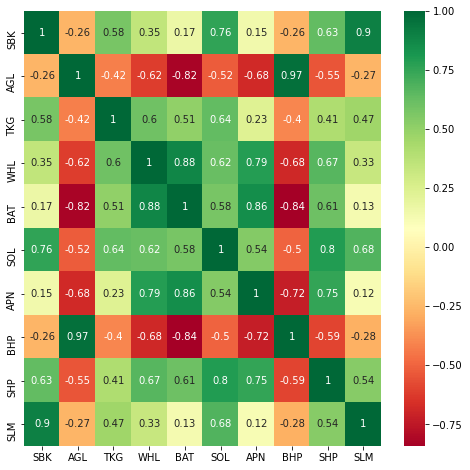

<Figure size 432x288 with 0 Axes>

In [87]:
# Importing the the required library to visualize the results 
import matplotlib.pyplot as plt 
import seaborn
import seaborn as sns
#find correlation matrix, i.e. the "distances" between each stock
plt.figure(figsize=(8, 8))
sns.heatmap(cor_matrix, annot=True, cmap='RdYlGn')
print("Cluster Heatmap: Correlation between assets price returns")
plt.figure()
plt.show()

## Creating the complete graph

In [88]:
## we then store the stock name as 
# extracts the indices from the correlation matrix, which are the stocks
stocks = cor_matrix.index.values

# Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(cor_matrix)

In [90]:
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)#,create_using=nx.MultiGraph)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#shows the edges with their corresponding weights
G.edges(data=True)

EdgeDataView([('SBK', 'SBK', {'weight': 1.0}), ('SBK', 'AGL', {'weight': -0.26218720842568155}), ('SBK', 'TKG', {'weight': 0.5776775146370766}), ('SBK', 'WHL', {'weight': 0.3500682084856409}), ('SBK', 'BAT', {'weight': 0.16776808860222314}), ('SBK', 'SOL', {'weight': 0.7608038570999492}), ('SBK', 'APN', {'weight': 0.1502691514035502}), ('SBK', 'BHP', {'weight': -0.2629232040508389}), ('SBK', 'SHP', {'weight': 0.6334238055979261}), ('SBK', 'SLM', {'weight': 0.9048139057556042}), ('AGL', 'AGL', {'weight': 1.0}), ('AGL', 'TKG', {'weight': -0.4231273305483419}), ('AGL', 'WHL', {'weight': -0.6160189616700922}), ('AGL', 'BAT', {'weight': -0.8218390481352222}), ('AGL', 'SOL', {'weight': -0.5222800659376231}), ('AGL', 'APN', {'weight': -0.6767480055133619}), ('AGL', 'BHP', {'weight': 0.9665212565468163}), ('AGL', 'SHP', {'weight': -0.5460917552084763}), ('AGL', 'SLM', {'weight': -0.26522402750854535}), ('TKG', 'TKG', {'weight': 1.0}), ('TKG', 'WHL', {'weight': 0.6023931848952061}), ('TKG', 'BA

## creating the complete graph using correlation matrix

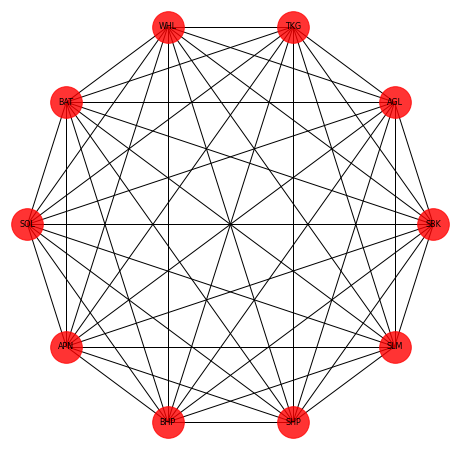

In [92]:
def create_complete_graph(G):
    edges,weights=zip(*nx.get_edge_attributes(G, 'weight').items())
    position=nx.circular_layout(G)
    plt.figure(figsize=(8,8))
    nx.draw_networkx_nodes(G,position,node_color='red',node_size=1000,alpha=0.8)
    nx.draw_networkx_labels(G,position,font_size=8,font_family='sans-serif')
    nx.draw_networkx_edges(G,position,edgelist=edges,style='solid')
    plt.axis('off')
    plt.show()
create_complete_graph(G)

In [94]:
#import matplotlib.pyplot as plt

In [105]:
# From this correlation mnatrix
my_array1 = pd.DataFrame(cor_matrix)
my_array1

,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.262187,0.577678,0.350068,0.167768,0.760804,0.150269,-0.262923,0.633424,0.904814
1,-0.262187,1.000000,-0.423127,-0.616019,-0.821839,-0.522280,-0.676748,0.966521,-0.546092,-0.265224
2,0.577678,-0.423127,1.000000,0.602393,0.507331,0.636241,0.231267,-0.395391,0.412191,0.465732
3,0.350068,-0.616019,0.602393,1.000000,0.881325,0.621750,0.785156,-0.684703,0.668680,0.329603
4,0.167768,-0.821839,0.507331,0.881325,1.000000,0.581571,0.855055,-0.841303,0.609839,0.132122
5,0.760804,-0.522280,0.636241,0.621750,0.581571,1.000000,0.544091,-0.501675,0.796682,0.678535
6,0.150269,-0.676748,0.231267,0.785156,0.855055,0.544091,1.000000,-0.720679,0.749933,0.115783
7,-0.262923,0.966521,-0.395391,-0.684703,-0.841303,-0.501675,-0.720679,1.000000,-0.592336,-0.277578
8,0.633424,-0.546092,0.412191,0.668680,0.609839,0.796682,0.749933,-0.592336,1.000000,0.537522
9,0.904814,-0.265224,0.465732,0.329603,0.132122,0.678535,0.115783,-0.277578,0.537522,1.000000


In [106]:
# change the column and index names and this is the require correlation matrix
my_array1.columns =['SBK','AGL','TKG','WHL','BAT','SOL','APN','BHP','SHP','SLM']
my_array1.index =['SBK','AGL','TKG','WHL','BAT','SOL','APN','BHP','SHP','SLM']
my_array1

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
SBK,1.000000,-0.262187,0.577678,0.350068,0.167768,0.760804,0.150269,-0.262923,0.633424,0.904814
AGL,-0.262187,1.000000,-0.423127,-0.616019,-0.821839,-0.522280,-0.676748,0.966521,-0.546092,-0.265224
TKG,0.577678,-0.423127,1.000000,0.602393,0.507331,0.636241,0.231267,-0.395391,0.412191,0.465732
WHL,0.350068,-0.616019,0.602393,1.000000,0.881325,0.621750,0.785156,-0.684703,0.668680,0.329603
BAT,0.167768,-0.821839,0.507331,0.881325,1.000000,0.581571,0.855055,-0.841303,0.609839,0.132122
SOL,0.760804,-0.522280,0.636241,0.621750,0.581571,1.000000,0.544091,-0.501675,0.796682,0.678535
APN,0.150269,-0.676748,0.231267,0.785156,0.855055,0.544091,1.000000,-0.720679,0.749933,0.115783
BHP,-0.262923,0.966521,-0.395391,-0.684703,-0.841303,-0.501675,-0.720679,1.000000,-0.592336,-0.277578
SHP,0.633424,-0.546092,0.412191,0.668680,0.609839,0.796682,0.749933,-0.592336,1.000000,0.537522
SLM,0.904814,-0.265224,0.465732,0.329603,0.132122,0.678535,0.115783,-0.277578,0.537522,1.000000


### In order to analyse the the correlations matrix as a network we first need to convert the correlations between assets to an edge list. This is a list containing information for each connection between each asset in our data. This format requires the ‘source’ node , the ‘target’ node and the ‘weight’ (correlation) of the link between the two

In [107]:
#convert matrix to list of edges and rename the columns
edges = my_array1.stack().reset_index()
edges.columns = ['Source_node','Target_node','correlation']

#remove self correlations
edges = edges.loc[edges['Source_node'] != edges['Target_node']].copy()

#show the first 5 rows of the edge list dataframe.
#edges.loc[33:67]
edges.tail(28)

,Source_node,Target_node,correlation
69,APN,SLM,0.115783
70,BHP,SBK,-0.262923
71,BHP,AGL,0.966521
72,BHP,TKG,-0.395391
73,BHP,WHL,-0.684703
74,BHP,BAT,-0.841303
75,BHP,SOL,-0.501675
76,BHP,APN,-0.720679
78,BHP,SHP,-0.592336
79,BHP,SLM,-0.277578


### Create graph from edge list

Now that we have an edge list we need to feed that into the networkx library to create a graph. Note that this network is undirected as the correlation between assets is the same in both directions.

In [108]:
# create undirected graph with weights corresponding to the correlation magnitude
G0 = nx.from_pandas_edgelist(edges, 'Source_node', 'Target_node', edge_attr=['correlation'])

# print out the graph info
# check number of nodes and degrees are as expected (all should have degree = 38, i.e. average degree = 38)
print(nx.info(G0))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 45
Average degree:   9.0000


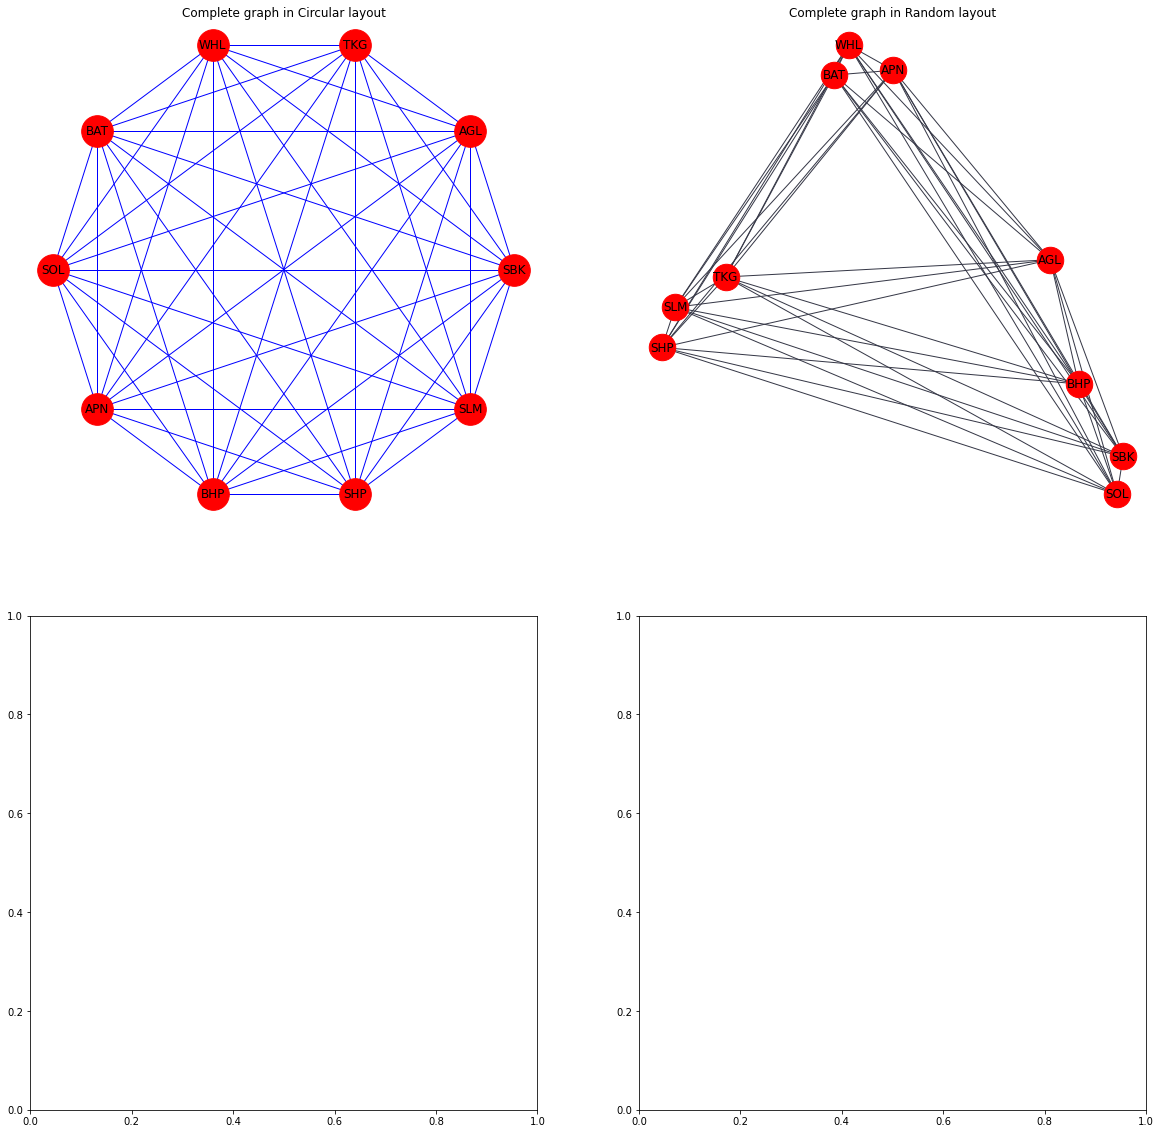

In [109]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(20,20))

nx.draw(G0, with_labels=True, node_size=1000, node_color="red",
        edge_color='blue',  pos=nx.circular_layout(G0),ax=ax[0,0])
ax[0,0].set_title("Complete graph in Circular layout")

nx.draw(G0, with_labels=True, node_size=700, node_color="red",
        edge_color='#363847',  pos=nx.random_layout(G0),ax=ax[0,1])
ax[0,1].set_title("Complete graph in Random layout")

plt.show()

## Creating the correlation egde we want by removing higher correlated edges

In [111]:
# 'winner takes all' method - set minium correlation threshold to remove some edges from the diagram
threshold = -0.5 # (removing all correlation >=-0.5)

# create a new graph from edge list
Gx = nx.from_pandas_edgelist(edges, 'Source_node', 'Target_node', edge_attr=['correlation'])

# list to store edges to remove
remove = []
# loop through edges in Gx and find correlations which are below the threshold
for Source_node, Target_node in Gx.edges():
    corr = Gx[Source_node][Target_node]['correlation']
    #add to remove node list if abs(corr) > threshold
    if corr > threshold:
        remove.append((Source_node, Target_node))

# remove edges contained in the remove list
Gx.remove_edges_from(remove)

print(str(len(remove)) + " edges removed")

35 edges removed


In [112]:
def assign_colour(correlation):
    if correlation <= 0:
        return "black"  # red
    else:
        return "black"  # green


def assign_thickness(correlation, benchmark_thickness=20, scaling_factor=3):
    return benchmark_thickness * abs(correlation)**scaling_factor


def assign_node_size(degree, scaling_factor=300):
    return degree * scaling_factor


# assign colours to edges depending on positive or negative correlation
# assign edge thickness depending on magnitude of correlation
edge_colours = []
edge_width = []
for key, value in nx.get_edge_attributes(Gx, 'correlation').items():
    edge_colours.append(assign_colour(value))
    edge_width.append(assign_thickness(value))

# assign node size depending on number of connections (degree)
node_size = []
for key, value in dict(Gx.degree).items():
    node_size.append(assign_node_size(value))

In [115]:
import seaborn as sns

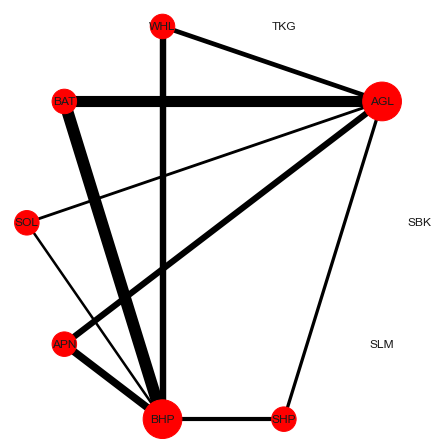

In [116]:
# draw improved graph correlation network for stock selection
sns.set(rc={'figure.figsize': (6, 6)})
font_dict = {'fontsize': 18}

nx.draw(Gx, pos=nx.circular_layout(Gx), with_labels=True,
        node_size=node_size, node_color="red", edge_color=edge_colours,
        width=edge_width)
#plt.title("Correlation network", fontdict=font_dict)
plt.show()

## We need to create the distance matrix from correlation matrix

In [123]:
# example on how to get the disatnce matrix values
np.sqrt((2*(1+0.262187)))

1.5888278698461957

In [124]:
# Now we create the distance matrix as follows
distance_matrix=np.sqrt(2*(1-my_array1))

# reset symbol as index (rather than 0-X)
distance_matrix.head().reset_index()

distance_matrix

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
SBK,0.000000,1.588828,0.919046,1.140116,1.290141,0.691659,1.303634,1.589291,0.856243,0.436317
AGL,1.588828,0.000000,1.687085,1.797787,1.908842,1.744867,1.831255,0.258761,1.758461,1.590738
TKG,0.919046,1.687085,0.000000,0.891748,0.992642,0.852947,1.239946,1.670563,1.084259,1.033700
WHL,1.140116,1.797787,0.891748,0.000000,0.487186,0.869770,0.655506,1.835594,0.814026,1.157926
BAT,1.290141,1.908842,0.992642,0.487186,0.000000,0.914799,0.538413,1.919012,0.883359,1.317481
SOL,0.691659,1.744867,0.852947,0.869770,0.914799,0.000000,0.954892,1.733018,0.637680,0.801830
APN,1.303634,1.831255,1.239946,0.655506,0.538413,0.954892,0.000000,1.855090,0.707202,1.329825
BHP,1.589291,0.258761,1.670563,1.835594,1.919012,1.733018,1.855090,0.000000,1.784565,1.598485
SHP,0.856243,1.758461,1.084259,0.814026,0.883359,0.637680,0.707202,1.784565,0.000000,0.961746
SLM,0.436317,1.590738,1.033700,1.157926,1.317481,0.801830,1.329825,1.598485,0.961746,0.000000


# Creating Minimum spanning tree using distance matrix

In [132]:
from jupyter_dash import JupyterDash
import dash_html_components as html

#app = JupyterDash(__name__)
#app.layout = html.Div([
#    html.H3("Largest evaluation of all time")
#])
#app.run_server(mode='jupyterlab')

In [134]:
# Now we can create MST visualization by using the following code
server=generate_mst_server(distance_matrix,jupyter=True)
server.run_server(mode='jupyterlab')

OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

Exception in thread Thread-42:
Traceback (most recent call last):
  File "/usr/lib/python3.9/threading.py", line 954, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.9/threading.py", line 892, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stamili/.local/lib/python3.9/site-packages/retrying.py", line 49, in wrapped_f
    return Retrying(*dargs, **dkw).call(f, *args, **kw)
  File "/home/stamili/.local/lib/python3.9/site-packages/retrying.py", line 212, in call
    raise attempt.get()
  File "/home/stamili/.local/lib/python3.9/site-packages/retrying.py", line 247, in get
    six.reraise(self.value[0], self.value[1], self.value[2])
  File "/usr/lib/python3/dist-packages/six.py", line 719, in reraise
    raise value
  File "/home/stamili/.local/lib/python3.9/site-packages/retrying.py", line 200, in call
    attempt = Attempt(fn(*args, **kwargs), attempt_number, False)
  File "/home/stamili/.local/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py", line

In [118]:
# We can choose the sector group as follow (deciding the group of stocks)
sector_group={"STANDARD BANK GROUP":["SBK"],
              "ANGLO AMERICAN PLC":["AGL"],
              "TELCOM SA SOC LTD":["TKG"],
             "WOOLWORTHS HOLDING LTD":["WHL"],
             "BRAIT PLC":["BAT"],
             "SASOL LTD":["SOL"],
             "ASPEN PHARMACARE HOLDINGS LTD":["APN"],
             "BHP GROUP PLC":["BHP"],
             "SHOPRITE HOLDING LTD":["SHP"],
             "SANLAM LTD":["SLM"]}
# we can make vertex size as follows
market_caps=[17.5,5.5,7.5,10.5,15.5,5.5,15.5,5.5,7.5,7.5]

In [122]:
# Now we can create MST visualization by using the following code
server=generate_mst_server(distance_matrix,jupyter=True,colours=sector_group)
server.run_server(mode='external',host="localhost",port=8051) # you can use 'inline'

Dash app running on http://localhost:8051/


## We want to calculate the degree centrality for each stock by using the formula 

$$D_c=\frac{\sum_{j=1}^{n}X_{ij}}{(n-1)(n-2)}$$

Where by;-

$n$ denote the total number of nodes $n=10$

$\sum_{j=1}^{n}X_{ij}$ denote the number of edges connecting node $x_i$

In [89]:
df = pd.DataFrame({'Ticker': ["SBK","TKG","SOL","WHL","SHP","BHP","BAT","APN","AGL","SLM"], 
                   'Stock name': ["STANDARD BANK GROUP LTD","TELCOME SA SOC LTD","SASOL LTD",
                                  "WOOLWORTHS HOLDING LTD","SHOPRITE HOLDING LTD","BHP GROUP PLC",
                                  "BRAIT PLC","ASPEN PHARMACARE HOLDING LTD","ANGLO AMERICAN PLC","SANLAM LTD"],
                   'Total no of nodes': [4,2,2,2,2,2,1,1,1,1]})
df

,Ticker,Stock name,Total no of nodes
0,SBK,STANDARD BANK GROUP LTD,4
1,TKG,TELCOME SA SOC LTD,2
2,SOL,SASOL LTD,2
3,WHL,WOOLWORTHS HOLDING LTD,2
4,SHP,SHOPRITE HOLDING LTD,2
5,BHP,BHP GROUP PLC,2
6,BAT,BRAIT PLC,1
7,APN,ASPEN PHARMACARE HOLDING LTD,1
8,AGL,ANGLO AMERICAN PLC,1
9,SLM,SANLAM LTD,1


## Using minimum spanning tree based on the degree centrality, the selection of stock is as follows

In [90]:
df["Degree Centrality"] = df["Total no of nodes"]/((10-1)*(10-2))
df

,Ticker,Stock name,Total no of nodes,Degree Centrality
0,SBK,STANDARD BANK GROUP LTD,4,0.055556
1,TKG,TELCOME SA SOC LTD,2,0.027778
2,SOL,SASOL LTD,2,0.027778
3,WHL,WOOLWORTHS HOLDING LTD,2,0.027778
4,SHP,SHOPRITE HOLDING LTD,2,0.027778
5,BHP,BHP GROUP PLC,2,0.027778
6,BAT,BRAIT PLC,1,0.013889
7,APN,ASPEN PHARMACARE HOLDING LTD,1,0.013889
8,AGL,ANGLO AMERICAN PLC,1,0.013889
9,SLM,SANLAM LTD,1,0.013889


In [91]:
# adding betweennes column
address = [0.8055555555555555,0.2222222222222222,0.38888888888888884,
                                          0.38888888888888884,0.2222222222222222,0.2222222222222222,
                                          0.0,0.0,0.0,0.0]
df['Betweeness Centrality'] = address
df

,Ticker,Stock name,Total no of nodes,Degree Centrality,Betweeness Centrality
0,SBK,STANDARD BANK GROUP LTD,4,0.055556,0.805556
1,TKG,TELCOME SA SOC LTD,2,0.027778,0.222222
2,SOL,SASOL LTD,2,0.027778,0.388889
3,WHL,WOOLWORTHS HOLDING LTD,2,0.027778,0.388889
4,SHP,SHOPRITE HOLDING LTD,2,0.027778,0.222222
5,BHP,BHP GROUP PLC,2,0.027778,0.222222
6,BAT,BRAIT PLC,1,0.013889,0.000000
7,APN,ASPEN PHARMACARE HOLDING LTD,1,0.013889,0.000000
8,AGL,ANGLO AMERICAN PLC,1,0.013889,0.000000
9,SLM,SANLAM LTD,1,0.013889,0.000000


In [92]:
# Adding closeness centrality 
address = [0.5625,0.4091,0.4500,0.4500,0.3462,0.3462,0.3000,0.2647,0.2647,0.3750]
df['Closeness Centrality'] = address
df

,Ticker,Stock name,Total no of nodes,Degree Centrality,Betweeness Centrality,Closeness Centrality
0,SBK,STANDARD BANK GROUP LTD,4,0.055556,0.805556,0.5625
1,TKG,TELCOME SA SOC LTD,2,0.027778,0.222222,0.4091
2,SOL,SASOL LTD,2,0.027778,0.388889,0.4500
3,WHL,WOOLWORTHS HOLDING LTD,2,0.027778,0.388889,0.4500
4,SHP,SHOPRITE HOLDING LTD,2,0.027778,0.222222,0.3462
5,BHP,BHP GROUP PLC,2,0.027778,0.222222,0.3462
6,BAT,BRAIT PLC,1,0.013889,0.000000,0.3000
7,APN,ASPEN PHARMACARE HOLDING LTD,1,0.013889,0.000000,0.2647
8,AGL,ANGLO AMERICAN PLC,1,0.013889,0.000000,0.2647
9,SLM,SANLAM LTD,1,0.013889,0.000000,0.3750


# Also, we can check for betweennes  and closseness centrality direct from the graph summary bellows

In [128]:
# Specifying the algorithim
server=generate_mst_server(distance_matrix,mst_algorithm="prim",jupyter=True,colours=sector_group)
server.run_server(mode='external',host="localhost",port=8051)

Dash app running on http://localhost:8051/


## Creating the Planar maximality filtered graph (PMFG)

In [129]:
# creating the Planar maximality filtered graph usind distance matrix
# creating PMFG object
pmj=PMFG(distance_matrix,"distance")

# creating PMFG  graph/extracting the graph
pmg_graph=pmj.get_graph()

In [130]:
from mlfinlab.networks.visualisations import generate_central_peripheral_ranking
# creating ranking based on the PMFG input
ranked_node=generate_central_peripheral_ranking(pmg_graph)
ranked_node=pd.DataFrame(ranked_node,columns=["Ranking","Node"])
ranked_node

,Ranking,Node
0,5.118650,BHP
1,5.882453,APN
2,5.913399,BAT
3,7.447532,AGL
4,7.450216,WHL
5,7.731199,SHP
6,10.466755,TKG
7,12.880125,SOL
8,17.312939,SLM
9,17.339979,SBK


In [131]:
ranked_node1=pd.DataFrame(ranked_node)
ranked_node2=ranked_node1.assign(Name_of_the_stock=["BHP GROUP PLC","ASPEN PHARMACARE HOLDING LTD","BRAIT PLC",
                                                    "ANGLO AMERICAN PLC","WOOLWORTHS HOLDING LTD","SHOPRITE HOLDING LTD",
                                                    "TELCOME SA SOC LTD","SASOL LTD","SANLAM LTD","STANDARD BANK GROUP LTD",])
ranked_node2

,Ranking,Node,Name_of_the_stock
0,5.118650,BHP,BHP GROUP PLC
1,5.882453,APN,ASPEN PHARMACARE HOLDING LTD
2,5.913399,BAT,BRAIT PLC
3,7.447532,AGL,ANGLO AMERICAN PLC
4,7.450216,WHL,WOOLWORTHS HOLDING LTD
5,7.731199,SHP,SHOPRITE HOLDING LTD
6,10.466755,TKG,TELCOME SA SOC LTD
7,12.880125,SOL,SASOL LTD
8,17.312939,SLM,SANLAM LTD
9,17.339979,SBK,STANDARD BANK GROUP LTD


In [134]:
# now we do stock selection as follows
m_stock=9

lowest_rank_peripheral=np.array(ranked_node.iloc[m_stock,1]).tolist()
higher_rank_central=np.array(ranked_node.iloc[-m_stock:,1]).tolist()

print(lowest_rank_peripheral)
print()
print(higher_rank_central)

SBK

['APN', 'BAT', 'AGL', 'WHL', 'SHP', 'TKG', 'SOL', 'SLM', 'SBK']


In [135]:
# Defining the colours to show different ranked node
colours={"lowest_rank_peripheral":lowest_rank_peripheral,"higher_rank_central":higher_rank_central}

In [137]:
# Generating PMFG visualization server
server1=generate_pmfg_server(my_array,jupyter=True)
server1.run_server(mode='external',host="localhost",port=8051)
#plt.savefig('REMSYA') 

/home/stamili/.local/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning: The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.
  func()


Dash app running on http://localhost:8051/
